# Advanced Level Task 2
Objective:  Next Word Prediction

In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activatiaon
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [24]:
path = '1661-0.txt'
text = open(path, encoding='utf-8').read().lower()
#print(text)

In [3]:
print('length of the corpus is: :', len(text))

length of the corpus is: : 581888


# *Data Preprocessing*

In [4]:
unique_words = sorted(list(set(text)))
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))
unique_index_word = dict((i, c) for i, c in enumerate(unique_words))
print(f'unique chars: {len(unique_words)}')

unique chars: 73


In [5]:
WORD_LENGTH = 7
step = 3
prev_words = []
next_words = []
for i in range(0, len(text) - WORD_LENGTH, step):
    prev_words.append(text[i:i + WORD_LENGTH])
    next_words.append(text[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

﻿
proje
c


In [6]:
print(f'num training examples: {len(prev_words)}')
print(f'num training examples: {len(next_words)}')

num training examples: 193961
num training examples: 193961


In [7]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
   for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
   Y[i, unique_word_index[next_words[i]]] = 1

prev_words[100]
next_words[300]

' '

In [8]:
X[0][0],X.shape

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True]),
 (193961, 7, 73))

In [9]:
Y[0],Y.shape

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False]),
 (193961, 73))

# *Model*

In [10]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


# *Training*

In [12]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=5, shuffle=True).history

C:\Users\7024d\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/5
1440/1440 [==============================] - 33s 19ms/step - loss: 1.9404 - accuracy: 0.4303 - val_loss: 2.0804 - val_accuracy: 0.4080
Epoch 2/5
1440/1440 [==============================] - 26s 18ms/step - loss: 1.6102 - accuracy: 0.5177 - val_loss: 2.0104 - val_accuracy: 0.4317
Epoch 3/5
1440/1440 [==============================] - 26s 18ms/step - loss: 1.5180 - accuracy: 0.5434 - val_loss: 1.9664 - val_accuracy: 0.4531
Epoch 4/5
1440/1440 [==============================] - 26s 18ms/step - loss: 1.4641 - accuracy: 0.5565 - val_loss: 1.9730 - val_accuracy: 0.4588
Epoch 5/5
1440/1440 [==============================] - 27s 18ms/step - loss: 1.4292 - accuracy: 0.5652 - val_loss: 1.9676 - val_accuracy: 0.4663


# *Loading*

In [13]:
model.save('next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

# *Evaluation*

In [14]:
loss_and_acc=model.evaluate(X,Y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6062/6062 [==============================] - 33s 5ms/step - loss: 1.3893 - accuracy: 0.5781
Test Loss 1.3892813920974731
Test Accuracy 0.5780801177024841


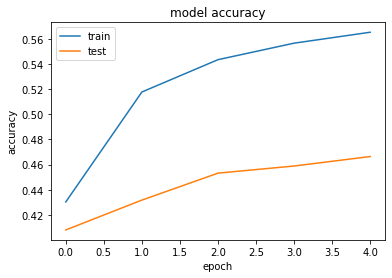

In [15]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

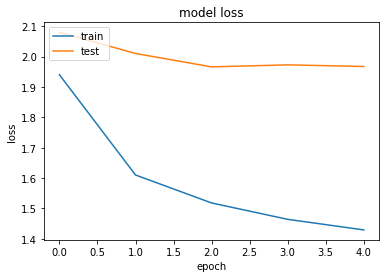

In [16]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [17]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(chars)))
    for t, char in enumerate(text):
       x[0, t, char_indices[char]] = 1.
    return x

#prepare_input("This is an example of input of our model".lower())

In [18]:
def sample(preds, top_n=3):
   preds = np.asarray(preds).astype('float64')
   preds = np.log(preds)
   exp_preds = np.exp(preds)
   preds = exp_preds / np.sum(exp_preds)
   return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [19]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [20]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [21]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

# *Prediction*

In [22]:
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [23]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of love, but a lack of
['the ', 'an ', 'such ', 'man ', 'present, ']

that which does not kill us makes us str
['ength ', 'uggle ', 'ong ', 'ange ', 'ive ']

i'm not upset that you lied to me, i'm u
['nder ', 'pon ', 'ses ', 't ', 'uder ']

and those who were seen dancing were tho
['se ', 're ', 'ugh ', ' servated ', 't ']

it is hard enough to remember my opinion
[' of ', 's ', ', ', 'nof ', 'ed ']

